# Import Library

In [1]:
import os
os.chdir('D:\\BFI')
os.getcwd()

import pandas as pd
pd.set_option('display.max_columns', None)

import polars as pl
pl.Config(tbl_cols=120)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

# Read Dataset

In [2]:
student_performance = pd.read_csv("LEARN/Student_Performance/Student_Performance.csv")
student_performance

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


# Columns Desc

school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)

age - student’s age (numeric: from 15 to 22)

address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)

guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20)

# Data Pre-Processing

In [3]:
student_performance_polars = pl.from_pandas(student_performance)
student_performance = (
    student_performance_polars
    .with_columns(
        ((pl.col("g1")+pl.col("g2")+pl.col("g3"))/3).alias("avg_grade")
    )
    .select(pl.exclude(["g1","g2","g3"]))
    .to_pandas()
)

In [4]:
categorical_col = student_performance.select_dtypes(include=['object']).columns.tolist()
numerical_col = student_performance.select_dtypes(include=['number']).columns.tolist()

In [5]:
student_performance_with_OHE = pd.get_dummies(student_performance, 
               columns=[
                   'school',
                   'sex',
                   'address',
                   'famsize',
                   'p_status',
                   'm_job',
                   'f_job',
                   'reason',
                   'guardian',
                   'schoolsup',
                   'famsup',
                   'paid',
                   'activities',
                   'nursery',
                   'higher',
                   'internet',
                   'romantic'
               ])

In [6]:
student_performance_with_OHE

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,avg_grade,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,p_status_A,p_status_T,m_job_at_home,m_job_health,m_job_other,m_job_services,m_job_teacher,f_job_at_home,f_job_health,f_job_other,f_job_services,f_job_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5.666667,True,False,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5.333333,True,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,3,3,10,8.333333,True,False,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,1,5,2,14.666667,True,False,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,2,5,4,8.666667,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9.000000,False,True,False,True,False,True,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,True,False,True,True,False,False,True,False,True,True,False,True,False
391,17,3,1,2,1,0,2,4,5,3,4,2,3,15.333333,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,3,3,3,8.333333,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11.000000,False,True,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False


In [7]:
X = student_performance_with_OHE.drop('avg_grade', axis=1).values
y = student_performance_with_OHE['avg_grade'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((276, 56), (276,), (119, 56), (119,))

In [9]:
# Scaling the data using pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_test

array([[ 0.21668659, -0.69162477, -1.41883525, ...,  0.42959208,
         0.72447352, -0.72447352],
       [ 0.99338138, -1.62735241, -0.47975005, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ],
       [ 0.99338138,  0.24410286,  0.45933515, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ],
       ...,
       [ 0.99338138,  0.24410286, -0.47975005, ...,  0.42959208,
         0.72447352, -0.72447352],
       [ 0.21668659, -0.69162477,  0.45933515, ..., -2.32778965,
         0.72447352, -0.72447352],
       [-0.5600082 ,  1.1798305 ,  1.39842035, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ]])

# Data Modelling

## Linear Regression

In [10]:
# initializing the algorithm
lin_reg = LinearRegression()

# Fitting Simple Linear Regression to the Training set
lin_reg.fit(X_train,y_train)

LinearRegression()

In [11]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('MAPE:', mape)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    
    return mae, mse, rmse, r2_square, mape

In [12]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.9417240129585207
MSE: 12.80492438504459
RMSE: 3.578396901553067
R2 Square: 0.1475819535563161
MAPE: 39.53849420879121
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.3464126294355725
MSE: 9.121873193118134
RMSE: 3.0202438962968094
R2 Square: 0.29936047493118845
MAPE: 32.15966344749363
__________________________________


In [13]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE","Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.941724,12.804924,3.578397,0.147582,39.538494,0.044459


## Robust Regression

In [14]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor( max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.136008461280237
MSE: 15.970465684602393
RMSE: 3.9963065053374462
R2 Square: -0.06314670436980174
MAPE: 41.090568594823985
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.5956147894357713
MSE: 12.261768368487198
RMSE: 3.501680791917961
R2 Square: 0.058189103891285954
MAPE: 33.95133819632149
__________________________________


In [15]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", "Cross Validation"])
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.941724,12.804924,3.578397,0.147582,39.538494,0.044459
1,Robust Regression,3.136008,15.970466,3.996307,-0.063147,41.090569,-0.666987


## Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.844776098548868
MSE: 11.526990291988271
RMSE: 3.395142160792133
R2 Square: 0.23265345029698614
MAPE: 38.22121599259852
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.3438070780954234
MSE: 9.102695719624315
RMSE: 3.0170674038914536
R2 Square: 0.3008334723776852
MAPE: 32.95344933386896
__________________________________


In [17]:
results_df_3 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", "Cross Validation"])

results_df = pd.merge(results_df , results_df_3 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.941724,12.804924,3.578397,0.147582,39.538494,0.044459
1,Robust Regression,3.136008,15.970466,3.996307,-0.063147,41.090569,-0.666987
2,Ridge Regression,2.844776,11.526990,3.395142,0.232653,38.221216,0.049020


## Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.0710490923995035
MSE: 13.104239610229815
RMSE: 3.6199778466490393
R2 Square: 0.1276566738864704
MAPE: 41.38279780403614
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.5698709086793956
MSE: 10.670990313324655
RMSE: 3.26664817715723
R2 Square: 0.1803747512317727
MAPE: 36.982193494760054
__________________________________


In [19]:
results_df_4 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", "Cross Validation"])
results_df = pd.merge(results_df , results_df_4 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.941724,12.804924,3.578397,0.147582,39.538494,0.044459
1,Robust Regression,3.136008,15.970466,3.996307,-0.063147,41.090569,-0.666987
2,Ridge Regression,2.844776,11.526990,3.395142,0.232653,38.221216,0.049020
3,Lasso Regression,3.071049,13.104240,3.619978,0.127657,41.382798,-0.060997


## Polynomail Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.8728515818650613
MSE: 24.315853080937156
RMSE: 4.9311107350106385
R2 Square: -0.6186953829319242
MAPE: 50.41405327551733
__________________________________
Train set evaluation:
_____________________________________
MAE: 8.907528499021546e-15
MSE: 1.2243814360513858e-28
RMSE: 1.106517707066356e-14
R2 Square: 1.0
MAPE: 1.0793575323643659e-13
__________________________________


In [21]:
results_df_5 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_5 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\3254154202.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_5 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.941724,12.804924,3.578397,0.147582,39.538494,0.044459
1,Robust Regression,3.136008,15.970466,3.996307,-0.063147,41.090569,-0.666987
2,Ridge Regression,2.844776,11.526990,3.395142,0.232653,38.221216,0.049020
3,Lasso Regression,3.071049,13.104240,3.619978,0.127657,41.382798,-0.060997
4,Polynomail Regression,3.872852,24.315853,4.931111,-0.618695,50.414053,0.000000


## Stochastic Gradient Descent

In [22]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.8132247383556623
MSE: 11.402824361947717
RMSE: 3.3768068292319766
R2 Square: 0.24091912031091056
MAPE: 34.85773158506705
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.4388340102527963
MSE: 9.447124411750005
RMSE: 3.0736174797378424
R2 Square: 0.27437834083155976
MAPE: 30.816648948229208
__________________________________


In [23]:
results_df_6 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_6 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\405123127.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_6 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.941724,12.804924,3.578397,0.147582,39.538494,0.044459
1,Robust Regression,3.136008,15.970466,3.996307,-0.063147,41.090569,-0.666987
2,Ridge Regression,2.844776,11.526990,3.395142,0.232653,38.221216,0.049020
3,Lasso Regression,3.071049,13.104240,3.619978,0.127657,41.382798,-0.060997
4,Polynomail Regression,3.872852,24.315853,4.931111,-0.618695,50.414053,0.000000
5,Stochastic Gradient Descent,2.813225,11.402824,3.376807,0.240919,34.857732,0.000000


## Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 2.6773809523809535
MSE: 10.506882800186753
RMSE: 3.2414322143439547
R2 Square: 0.3005615463681828
MAPE: 34.80779202926255
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.9269480676328425
MSE: 1.4509220962157623
RMSE: 1.2045422766411158
R2 Square: 0.8885565117073327
MAPE: 12.563948788043
__________________________________


In [25]:
results_df_7 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_7 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\523100768.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_7 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.941724,12.804924,3.578397,0.147582,39.538494,0.044459
1,Robust Regression,3.136008,15.970466,3.996307,-0.063147,41.090569,-0.666987
2,Ridge Regression,2.844776,11.526990,3.395142,0.232653,38.221216,0.049020
3,Lasso Regression,3.071049,13.104240,3.619978,0.127657,41.382798,-0.060997
4,Polynomail Regression,3.872852,24.315853,4.931111,-0.618695,50.414053,0.000000
5,Stochastic Gradient Descent,2.813225,11.402824,3.376807,0.240919,34.857732,0.000000
6,Random Forest Regressor,2.677381,10.506883,3.241432,0.300562,34.807792,0.000000


## SVM Regressor

In [26]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 2.8416878364295948
MSE: 12.999080582976513
RMSE: 3.605423773008731
R2 Square: 0.13465706294631286
MAPE: 38.05346139387466
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010775185753030881
MSE: 1.2155165548797601e-06
RMSE: 0.001102504673404952
R2 Square: 0.9999999066377131
MAPE: 0.01195030388844161
__________________________________


In [27]:
results_df_8 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_8 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\1941749337.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_8 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.941724,12.804924,3.578397,0.147582,39.538494,0.044459
1,Robust Regression,3.136008,15.970466,3.996307,-0.063147,41.090569,-0.666987
2,Ridge Regression,2.844776,11.526990,3.395142,0.232653,38.221216,0.049020
3,Lasso Regression,3.071049,13.104240,3.619978,0.127657,41.382798,-0.060997
4,Polynomail Regression,3.872852,24.315853,4.931111,-0.618695,50.414053,0.000000
5,Stochastic Gradient Descent,2.813225,11.402824,3.376807,0.240919,34.857732,0.000000
6,Random Forest Regressor,2.677381,10.506883,3.241432,0.300562,34.807792,0.000000
7,SVM Regressor,2.841688,12.999081,3.605424,0.134657,38.053461,0.000000


## XGBoost Regression

In [28]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=100,             # Number of trees
    learning_rate=0.1,            # Learning rate
    max_depth=6,                  # Maximum depth of trees
    random_state=42               # For reproducibility
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
test_pred = xgb_model.predict(X_test)
train_pred = xgb_model.predict(X_train)

# Evaluate the model
print('XGBoost Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('XGBoost Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# Cross-validation for XGBoost
xgb_cross_val = cross_val(XGBRegressor(objective='reg:squarederror', random_state=42))



XGBoost Test set evaluation:
_____________________________________
MAE: 2.8088979373792977
MSE: 11.406737813909922
RMSE: 3.3773862399657406
R2 Square: 0.24065860357717872
MAPE: 35.75258958880478
__________________________________
XGBoost Train set evaluation:
_____________________________________
MAE: 0.18581076189515663
MSE: 0.0804132065621987
RMSE: 0.28357222459577863
R2 Square: 0.9938235634652864
MAPE: 2.2615180596365163
__________________________________


In [29]:
results_df_9 = pd.DataFrame(data=[["XGBoost Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_9 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\598821983.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_9 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.941724,12.804924,3.578397,0.147582,39.538494,0.044459
1,Robust Regression,3.136008,15.970466,3.996307,-0.063147,41.090569,-0.666987
2,Ridge Regression,2.844776,11.526990,3.395142,0.232653,38.221216,0.049020
3,Lasso Regression,3.071049,13.104240,3.619978,0.127657,41.382798,-0.060997
4,Polynomail Regression,3.872852,24.315853,4.931111,-0.618695,50.414053,0.000000
5,Stochastic Gradient Descent,2.813225,11.402824,3.376807,0.240919,34.857732,0.000000
6,Random Forest Regressor,2.677381,10.506883,3.241432,0.300562,34.807792,0.000000
7,SVM Regressor,2.841688,12.999081,3.605424,0.134657,38.053461,0.000000
8,XGBoost Regression,2.808898,11.406738,3.377386,0.240659,35.752590,0.000000


## TensorFlow Regression

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the TensorFlow model
tf_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(64, activation='relu'),                              # Hidden layer 1
    Dense(32, activation='relu'),                              # Hidden layer 2
    Dense(1, activation='linear')                              # Output layer
])

# Compile the model
tf_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = tf_model.fit(
    X_train, y_train,
    epochs=100,                  # Number of training epochs
    batch_size=32,               # Size of each training batch
    validation_data=(X_test, y_test),
    verbose=1                    # Display training progress
)

# Evaluate the model on the test set
test_pred = tf_model.predict(X_test).flatten()
train_pred = tf_model.predict(X_train).flatten()

print('TensorFlow Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('TensorFlow Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Epoch 1/100
9/9 [==============================] - 4s 79ms/step - loss: 99.6904 - mae: 9.2510 - val_loss: 75.9845 - val_mae: 7.7878
Epoch 2/100
9/9 [==============================] - 0s 23ms/step - loss: 58.9160 - mae: 6.8031 - val_loss: 36.9751 - val_mae: 5.0058
Epoch 3/100
9/9 [==============================] - 0s 18ms/step - loss: 23.1669 - mae: 3.9953 - val_loss: 17.0401 - val_mae: 3.4252
Epoch 4/100
9/9 [==============================] - 0s 17ms/step - loss: 15.3410 - mae: 3.0394 - val_loss: 18.6890 - val_mae: 3.6081
Epoch 5/100
9/9 [==============================] - 0s 16ms/step - loss: 12.1612 - mae: 2.7191 - val_loss: 13.6902 - val_mae: 3.0425
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 9.6083 - mae: 2.4676 - val_loss: 12.9844 - val_mae: 2.9584
Epoch 7/100
9/9 [==============================] - 0s 19ms/step - loss: 8.7925 - mae: 2.3592 - val_loss: 12.6491 - val_mae: 2.9236
Epoch 8/100
9/9 [==============================] - 0s 17ms/step - loss: 8.0835

In [31]:
results_df_10 = pd.DataFrame(data=[["TensorFlow Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_10 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\879674907.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_10 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.941724,12.804924,3.578397,0.147582,39.538494,0.044459
1,Robust Regression,3.136008,15.970466,3.996307,-0.063147,41.090569,-0.666987
2,Ridge Regression,2.844776,11.526990,3.395142,0.232653,38.221216,0.049020
3,Lasso Regression,3.071049,13.104240,3.619978,0.127657,41.382798,-0.060997
4,Polynomail Regression,3.872852,24.315853,4.931111,-0.618695,50.414053,0.000000
5,Stochastic Gradient Descent,2.813225,11.402824,3.376807,0.240919,34.857732,0.000000
6,Random Forest Regressor,2.677381,10.506883,3.241432,0.300562,34.807792,0.000000
7,SVM Regressor,2.841688,12.999081,3.605424,0.134657,38.053461,0.000000
8,XGBoost Regression,2.808898,11.406738,3.377386,0.240659,35.752590,0.000000
9,TensorFlow Regression,3.377070,16.576919,4.071476,-0.103518,43.060179,0.000000


## Model Evaluation

In [32]:
results_df.sort_values(by=['MAPE']).to_csv("LEARN/Student_Performance/model_eval_before_feature_selection.csv",index=False)

Text(0.5, 0, 'R2')

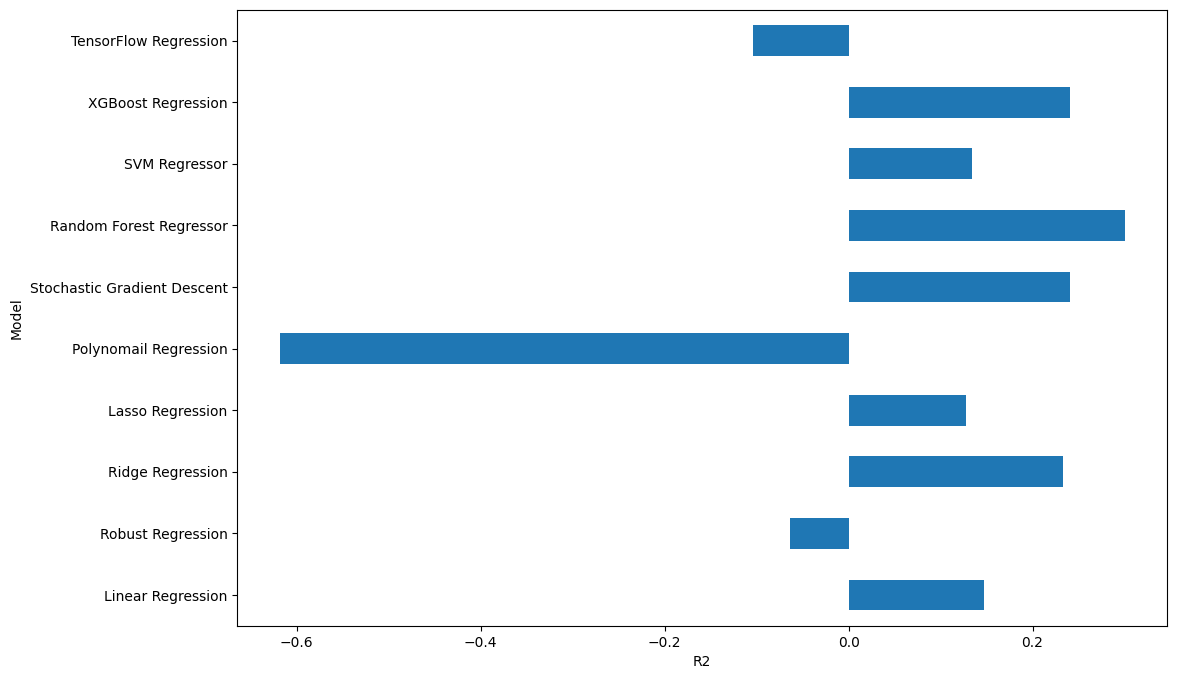

In [33]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))
plt.xlabel('R2')

# Feature Selection

In [34]:
X = student_performance_with_OHE.drop('avg_grade', axis=1)
y = student_performance_with_OHE['avg_grade']

In [35]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [36]:
len(X.columns)

56

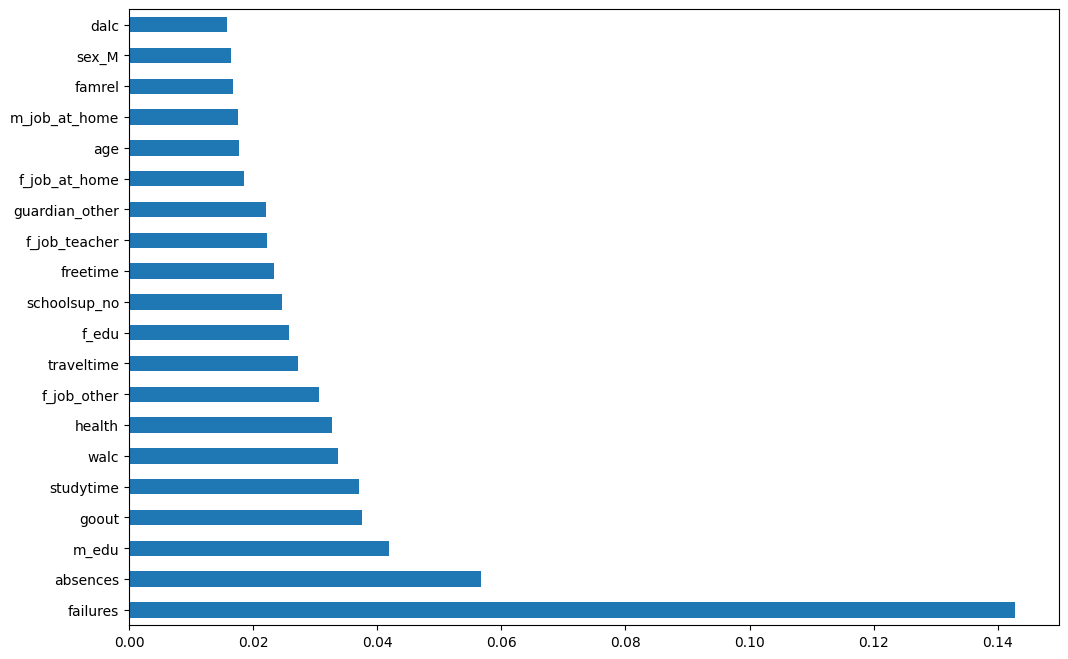

In [37]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Data Modelling After Feature Selection

In [38]:
X = student_performance_with_OHE[['failures','absences', 'm_edu']].values
y = student_performance_with_OHE[['avg_grade']].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((276, 3), (276, 1), (119, 3), (119, 1))

In [40]:

# Scaling the data using pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_test

array([[ 3.60758748, -0.45164147, -0.69162477],
       [-0.46200712, -0.33654171, -1.62735241],
       [ 0.89452442,  0.23895712,  0.24410286],
       [-0.46200712,  0.23895712, -0.69162477],
       [ 2.25105595,  0.58425642, -0.69162477],
       [-0.46200712, -0.68184101, -0.69162477],
       [-0.46200712, -0.45164147,  1.1798305 ],
       [-0.46200712,  1.38995479, -1.62735241],
       [-0.46200712, -0.68184101, -0.69162477],
       [-0.46200712, -0.45164147,  1.1798305 ],
       [-0.46200712, -0.68184101,  0.24410286],
       [-0.46200712,  0.00875759,  1.1798305 ],
       [-0.46200712, -0.56674124,  0.24410286],
       [-0.46200712, -0.68184101,  0.24410286],
       [-0.46200712,  0.23895712, -0.69162477],
       [-0.46200712, -0.45164147, -0.69162477],
       [-0.46200712, -0.68184101, -0.69162477],
       [-0.46200712, -0.45164147, -1.62735241],
       [-0.46200712, -0.68184101, -2.56308004],
       [-0.46200712, -0.68184101, -0.69162477],
       [-0.46200712, -0.22144194,  1.179

## Linear Regression

In [41]:
# initializing the algorithm
lin_reg = LinearRegression()

# Fitting Simple Linear Regression to the Training set
lin_reg.fit(X_train,y_train)

LinearRegression()

In [42]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('MAPE:', mape)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    
    return mae, mse, rmse, r2_square, mape

In [43]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.9091912834605838
MSE: 12.565670242319436
RMSE: 3.544808914782211
R2 Square: 0.16350899403017694
MAPE: 38.977173805021934
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.66630972688881
MSE: 10.982627360341917
RMSE: 3.314004731490575
R2 Square: 0.15643830440846573
MAPE: 36.98692392331303
__________________________________


In [44]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square',"MAPE", "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.909191,12.56567,3.544809,0.163509,38.977174,0.080893


## Robust Regression

In [45]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor( max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.0553230820578117
MSE: 13.669867172314426
RMSE: 3.6972783466104397
R2 Square: 0.09000310194894345
MAPE: 42.50830146655144
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.7881806931631816
MSE: 12.46184372421725
RMSE: 3.5301336694546355
R2 Square: 0.04282156925789138
MAPE: 41.20866632445553
__________________________________


In [46]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", "Cross Validation"])
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.909191,12.565670,3.544809,0.163509,38.977174,0.080893
1,Robust Regression,3.055323,13.669867,3.697278,0.090003,42.508301,-0.137592


## Ridge Regression

In [47]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.939467313496237
MSE: 12.737338582862403
RMSE: 3.5689408208686233
R2 Square: 0.15208110995358104
MAPE: 39.67698354075277
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.6650870695034996
MSE: 11.103163418197479
RMSE: 3.3321409661353583
R2 Square: 0.14718008249048276
MAPE: 37.56590763031899
__________________________________


In [48]:
results_df_3 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", "Cross Validation"])

results_df = pd.merge(results_df , results_df_3 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.909191,12.565670,3.544809,0.163509,38.977174,0.080893
1,Robust Regression,3.055323,13.669867,3.697278,0.090003,42.508301,-0.137592
2,Ridge Regression,2.939467,12.737339,3.568941,0.152081,39.676984,0.080901


## Lasso Regression

In [49]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.134151194362378
MSE: 14.064637257047275
RMSE: 3.7502849567795877
R2 Square: 0.06372343529074709
MAPE: 44.61829739565094
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.8098387237466507
MSE: 12.533381290836063
RMSE: 3.540251585810825
R2 Square: 0.03732685938424418
MAPE: 42.060251174701065
__________________________________


In [50]:
results_df_4 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", "Cross Validation"])
results_df = pd.merge(results_df , results_df_4 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.909191,12.565670,3.544809,0.163509,38.977174,0.080893
1,Robust Regression,3.055323,13.669867,3.697278,0.090003,42.508301,-0.137592
2,Ridge Regression,2.939467,12.737339,3.568941,0.152081,39.676984,0.080901
3,Lasso Regression,3.134151,14.064637,3.750285,0.063723,44.618297,-0.060997


## Polynomail Regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.8993634767525096
MSE: 12.402805935612362
RMSE: 3.5217617658797367
R2 Square: 0.17435079754139426
MAPE: 38.170868976310274
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.5801231778032303
MSE: 10.444960607792758
RMSE: 3.2318664279008744
R2 Square: 0.1977358065964523
MAPE: 34.73084200929546
__________________________________


In [52]:
results_df_5 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_5 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\3254154202.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_5 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.909191,12.565670,3.544809,0.163509,38.977174,0.080893
1,Robust Regression,3.055323,13.669867,3.697278,0.090003,42.508301,-0.137592
2,Ridge Regression,2.939467,12.737339,3.568941,0.152081,39.676984,0.080901
3,Lasso Regression,3.134151,14.064637,3.750285,0.063723,44.618297,-0.060997
4,Polynomail Regression,2.899363,12.402806,3.521762,0.174351,38.170869,0.000000


## Stochastic Gradient Descent

In [53]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

C:\Users\097754\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set evaluation:
_____________________________________
MAE: 2.9255897541795486
MSE: 12.746952277482535
RMSE: 3.5702874222508383
R2 Square: 0.15144113063462705
MAPE: 43.1630093621722
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.7214606771424035
MSE: 11.549155800224192
RMSE: 3.398404890566189
R2 Square: 0.112923972576211
MAPE: 41.50707508306398
__________________________________


In [54]:
results_df_6 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_6 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\405123127.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_6 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.909191,12.565670,3.544809,0.163509,38.977174,0.080893
1,Robust Regression,3.055323,13.669867,3.697278,0.090003,42.508301,-0.137592
2,Ridge Regression,2.939467,12.737339,3.568941,0.152081,39.676984,0.080901
3,Lasso Regression,3.134151,14.064637,3.750285,0.063723,44.618297,-0.060997
4,Polynomail Regression,2.899363,12.402806,3.521762,0.174351,38.170869,0.000000
5,Stochastic Gradient Descent,2.925590,12.746952,3.570287,0.151441,43.163009,0.000000


## Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



C:\Users\097754\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test set evaluation:
_____________________________________
MAE: 2.9939737721724353
MSE: 14.053245552056946
RMSE: 3.7487658705308533
R2 Square: 0.06448177595887783
MAPE: 50.573573431975284
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.009421144375042
MSE: 7.102901894698358
RMSE: 2.66512699410335
R2 Square: 0.4544351028836573
MAPE: 46.5944024714117
__________________________________


In [56]:
results_df_7 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_7 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\523100768.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_7 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.909191,12.565670,3.544809,0.163509,38.977174,0.080893
1,Robust Regression,3.055323,13.669867,3.697278,0.090003,42.508301,-0.137592
2,Ridge Regression,2.939467,12.737339,3.568941,0.152081,39.676984,0.080901
3,Lasso Regression,3.134151,14.064637,3.750285,0.063723,44.618297,-0.060997
4,Polynomail Regression,2.899363,12.402806,3.521762,0.174351,38.170869,0.000000
5,Stochastic Gradient Descent,2.925590,12.746952,3.570287,0.151441,43.163009,0.000000
6,Random Forest Regressor,2.993974,14.053246,3.748766,0.064482,50.573573,0.000000


## SVM Regressor

In [57]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



C:\Users\097754\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set evaluation:
_____________________________________
MAE: 6.5864976055508855
MSE: 541.0528494955081
RMSE: 23.26054276012295
R2 Square: -35.01764439377777
MAPE: 91.48607870960949
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.9734053605408712
MSE: 8.406526892299715
RMSE: 2.8994011264914197
R2 Square: 0.35430531815081046
MAPE: 48.11221152016575
__________________________________


In [58]:
results_df_8 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_8 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\1941749337.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_8 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.909191,12.565670,3.544809,0.163509,38.977174,0.080893
1,Robust Regression,3.055323,13.669867,3.697278,0.090003,42.508301,-0.137592
2,Ridge Regression,2.939467,12.737339,3.568941,0.152081,39.676984,0.080901
3,Lasso Regression,3.134151,14.064637,3.750285,0.063723,44.618297,-0.060997
4,Polynomail Regression,2.899363,12.402806,3.521762,0.174351,38.170869,0.000000
5,Stochastic Gradient Descent,2.925590,12.746952,3.570287,0.151441,43.163009,0.000000
6,Random Forest Regressor,2.993974,14.053246,3.748766,0.064482,50.573573,0.000000
7,SVM Regressor,6.586498,541.052849,23.260543,-35.017644,91.486079,0.000000


## XGBoost Regression

In [59]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    objective='reg:squarederror',  # Regression task
    n_estimators=100,             # Number of trees
    learning_rate=0.1,            # Learning rate
    max_depth=6,                  # Maximum depth of trees
    random_state=42               # For reproducibility
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
test_pred = xgb_model.predict(X_test)
train_pred = xgb_model.predict(X_train)

# Evaluate the model
print('XGBoost Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('XGBoost Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# Cross-validation for XGBoost
xgb_cross_val = cross_val(XGBRegressor(objective='reg:squarederror', random_state=42))



XGBoost Test set evaluation:
_____________________________________
MAE: 3.0238305540645825
MSE: 14.441901705358829
RMSE: 3.800250216151409
R2 Square: 0.03860911096111774
MAPE: 50.91362976222145
__________________________________
XGBoost Train set evaluation:
_____________________________________
MAE: 1.853643181819271
MSE: 6.814114966542008
RMSE: 2.6103859803757006
R2 Square: 0.4766164610220488
MAPE: 47.172476947478906
__________________________________


In [60]:
results_df_9 = pd.DataFrame(data=[["XGBoost Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_9 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\598821983.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_9 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.909191,12.565670,3.544809,0.163509,38.977174,0.080893
1,Robust Regression,3.055323,13.669867,3.697278,0.090003,42.508301,-0.137592
2,Ridge Regression,2.939467,12.737339,3.568941,0.152081,39.676984,0.080901
3,Lasso Regression,3.134151,14.064637,3.750285,0.063723,44.618297,-0.060997
4,Polynomail Regression,2.899363,12.402806,3.521762,0.174351,38.170869,0.000000
5,Stochastic Gradient Descent,2.925590,12.746952,3.570287,0.151441,43.163009,0.000000
6,Random Forest Regressor,2.993974,14.053246,3.748766,0.064482,50.573573,0.000000
7,SVM Regressor,6.586498,541.052849,23.260543,-35.017644,91.486079,0.000000
8,XGBoost Regression,3.023831,14.441902,3.800250,0.038609,50.913630,0.000000


## TensorFlow Regression

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the TensorFlow model
tf_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(64, activation='relu'),                              # Hidden layer 1
    Dense(32, activation='relu'),                              # Hidden layer 2
    Dense(1, activation='linear')                              # Output layer
])

# Compile the model
tf_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = tf_model.fit(
    X_train, y_train,
    epochs=100,                  # Number of training epochs
    batch_size=32,               # Size of each training batch
    validation_data=(X_test, y_test),
    verbose=1                    # Display training progress
)

# Evaluate the model on the test set
test_pred = tf_model.predict(X_test).flatten()
train_pred = tf_model.predict(X_train).flatten()

print('TensorFlow Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('TensorFlow Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Epoch 1/100
9/9 [==============================] - 3s 55ms/step - loss: 124.9858 - mae: 10.5815 - val_loss: 117.4172 - val_mae: 10.1085
Epoch 2/100
9/9 [==============================] - 0s 15ms/step - loss: 115.1071 - mae: 10.0819 - val_loss: 105.2642 - val_mae: 9.4728
Epoch 3/100
9/9 [==============================] - 0s 15ms/step - loss: 100.6363 - mae: 9.3244 - val_loss: 87.1332 - val_mae: 8.4376
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 79.6505 - mae: 8.0947 - val_loss: 62.2874 - val_mae: 6.8408
Epoch 5/100
9/9 [==============================] - 0s 22ms/step - loss: 53.5025 - mae: 6.4520 - val_loss: 35.1622 - val_mae: 4.9065
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 30.7345 - mae: 4.5812 - val_loss: 20.0819 - val_mae: 3.6929
Epoch 7/100
9/9 [==============================] - 0s 18ms/step - loss: 22.2519 - mae: 3.6470 - val_loss: 17.4686 - val_mae: 3.4301
Epoch 8/100
9/9 [==============================] - 0s 20ms/step - lo

In [62]:
results_df_10 = pd.DataFrame(data=[["TensorFlow Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "MAPE", 'Cross Validation'])
results_df = pd.merge(results_df , results_df_10 , how='outer')
results_df

C:\Users\097754\AppData\Local\Temp\ipykernel_38124\879674907.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_10 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
0,Linear Regression,2.909191,12.565670,3.544809,0.163509,38.977174,0.080893
1,Robust Regression,3.055323,13.669867,3.697278,0.090003,42.508301,-0.137592
2,Ridge Regression,2.939467,12.737339,3.568941,0.152081,39.676984,0.080901
3,Lasso Regression,3.134151,14.064637,3.750285,0.063723,44.618297,-0.060997
4,Polynomail Regression,2.899363,12.402806,3.521762,0.174351,38.170869,0.000000
5,Stochastic Gradient Descent,2.925590,12.746952,3.570287,0.151441,43.163009,0.000000
6,Random Forest Regressor,2.993974,14.053246,3.748766,0.064482,50.573573,0.000000
7,SVM Regressor,6.586498,541.052849,23.260543,-35.017644,91.486079,0.000000
8,XGBoost Regression,3.023831,14.441902,3.800250,0.038609,50.913630,0.000000
9,TensorFlow Regression,2.910751,12.602225,3.549961,0.161076,48.146607,0.000000


## Model Evaluation

In [63]:
results_df.sort_values(by=['MAPE'])

,Model,MAE,MSE,RMSE,R2 Square,MAPE,Cross Validation
4,Polynomail Regression,2.899363,12.402806,3.521762,0.174351,38.170869,0.000000
0,Linear Regression,2.909191,12.565670,3.544809,0.163509,38.977174,0.080893
2,Ridge Regression,2.939467,12.737339,3.568941,0.152081,39.676984,0.080901
1,Robust Regression,3.055323,13.669867,3.697278,0.090003,42.508301,-0.137592
5,Stochastic Gradient Descent,2.925590,12.746952,3.570287,0.151441,43.163009,0.000000
3,Lasso Regression,3.134151,14.064637,3.750285,0.063723,44.618297,-0.060997
9,TensorFlow Regression,2.910751,12.602225,3.549961,0.161076,48.146607,0.000000
6,Random Forest Regressor,2.993974,14.053246,3.748766,0.064482,50.573573,0.000000
8,XGBoost Regression,3.023831,14.441902,3.800250,0.038609,50.913630,0.000000
7,SVM Regressor,6.586498,541.052849,23.260543,-35.017644,91.486079,0.000000


In [64]:
results_df.sort_values(by=['MAPE']).to_csv("LEARN/Student_Performance/model_eval_after_feature_selection.csv",index=False)